# Quantum Teleportation

## Teleportation of pure states

Let's start this off with the standard protocol that you all studied, for Teleportation, which in some sense is kind of the inverse of Super Dense Coding, sending two bits of information in order to obtain the state of the other person's qubit (which is now their own qubit, by teleportation)

Explain the protocol in your own words and also code up the circuit for the same (measurements can be kept at the end as well, even though that's not what's happening in the protocol)

<IPython.core.display.Latex object>

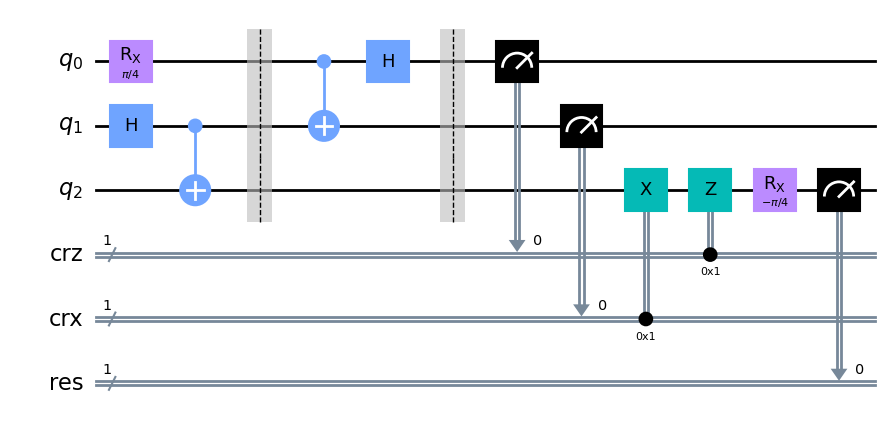

In [30]:
# Circuit for teleporting a pure state
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector
from math import pi
import IPython.display

## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
# Create random 1-qubit state
psi = random_statevector(2)

display(array_to_latex(psi, prefix="|\\psi\\rangle ="))


qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
res = ClassicalRegister(1, name="res")

teleportation_circuit = QuantumCircuit(qr, crz, crx, res)
teleportation_circuit.rx(pi/4, 0)
teleportation_circuit.h(1)
teleportation_circuit.cx(1,2)

teleportation_circuit.barrier()

teleportation_circuit.cx(0,1)
teleportation_circuit.h(0)

teleportation_circuit.barrier()

teleportation_circuit.measure(0,0)
teleportation_circuit.measure(1,1)


teleportation_circuit.x(2).c_if(crx, 1)
teleportation_circuit.z(2).c_if(crz, 1)

teleportation_circuit.rx(-pi/4, 2)
teleportation_circuit.measure(2,2)

teleportation_circuit.draw('mpl')

In [31]:
from qiskit_aer import AerSimulator
from qiskit import execute
sim = AerSimulator()
job = execute(teleportation_circuit, sim, shots=2000)
result = job.result()
counts = result.get_counts()
print(counts)

{'0 0 0': 470, '0 0 1': 510, '0 1 1': 515, '0 1 0': 505}


In all the results , the first qubit is in state 0 , so the state was fully teleported

## Mixed States

Let's take this further by considering the problem of teleporting a mixed state from one person to another. 

It should be straightforward to see that you can't directly use the Quantum Teleportation Protocol, since it is assumed that the state to be teleported has a state $$ \alpha|0\rangle + \beta|1\rangle $$ which is a pure state vector.

Starting with a concrete example, let's look at transporting the qubit with density matrix $$ \frac{2}{3}|0\rangle \langle 0| + \frac{1}{3}|1\rangle \langle 1| $$ 

Can you design a protocol that uses Quantum Teleportation as a component to transport this mixed state from one person to another? Feel free to use ancilla qubits (could be qubits that are prepared in the states $|0\rangle$ or $|1\rangle$)

Hint : Maybe Schmidt Decompositions and Purifications would come in handy

Optional : You could code up the circuit in Qiskit as well

### Solution
This problem can be solved simply by using purification and ancillary states.
To represent the qubit with the given density operatot , we will simply purify it wih an extra qubit to form the state:$$\sqrt{\frac{2}{3}}\ket{00} + \sqrt{\frac{1}{3}}\ket{11}$$.  The reduced density of this state with repect to the first qubit exactly forms the given density operator . We can then later perform all operations on the left qubit and treat it as a normal qubit for the teleportation circuit. Measuring this qubit will behave as the the density operator.